<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/121_MODEL_NLP_TEXTSUMMARIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -U spacy

In [ ]:
#!python -m spacy download en_core_web_lg

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

# IMPORT DATASET

In [ ]:
book= pd.read_csv('/content/04. Time Management author Brian Tracy (1).txt',error_bad_lines=False)
book

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 20: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 3\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 47: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 3\nSkipping line 65: expected 1 fields, saw 5\nSkipping line 66: expected 1 fields, saw 5\nSkipping line 67: expected 1 fields, saw 4\nSkipping line 72: expected 1 fields, saw 2\nSkipping line 74: expected 1 fields, saw 3\nSkipping line 75: expected 1 fields, saw 6\nSkipping line 76: expected 1 fields, saw 2\nSkipping line 94: expected 1 fields, saw 2\nSkipping line 142: expected 1 fields, saw 2\nSkipping line 158: expected 1 fields, saw 2\nSkipping line 159: expected 1 fields, saw 2\nSkipping line 162: expected 1 fields, saw 2\nSkipping 

,THE BRIAN TRACY SUCCESS LIBRARY
0,BRIAN TRACY
1,i
2,MANAGEMENT
3,TIME MANAGEMENT
4,American Management Association / www.amanet.org
...,...
1920,Assoclation®
1921,Pee cel mere
1922,RCO]
1923,American Management Association / www.amanet.org


In [ ]:
book

,THE BRIAN TRACY SUCCESS LIBRARY
0,BRIAN TRACY
1,i
2,MANAGEMENT
3,TIME MANAGEMENT
4,American Management Association / www.amanet.org
...,...
1920,Assoclation®
1921,Pee cel mere
1922,RCO]
1923,American Management Association / www.amanet.org


In [ ]:
book.columns=['x']

In [ ]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book

['BRIAN TRACY',
 'i',
 'MANAGEMENT',
 'TIME MANAGEMENT',
 'American Management Association / www.amanet.org',
 'American Management Association / www.amanet.org',
 'TIME',
 'MANAGEMENT',
 'BRIAN TRACY',
 '*AMACOM americAN MANAGEMENT ASSOCIATION',
 'New York = Atlanta = Brussels = Chicago += Mexico City',
 'American Management Association / www.amanet.org',
 'Bulk discounts available. For details visit:',
 'www.amacombooks.org/go/specialsales',
 'Or contact special sales:',
 'Phone: 800-250-5308 / E-mail: specialsls@amanet.org',
 'View all the AMACOM titles at: www.amacombooks.org',
 'This publication is designed to provide accurate and authoritative information in',
 'regard to the subject matter covered. It is sold with the understanding that the',
 'petent professional person should be sought.',
 'Library of Congress Cataloging-in-Publication Data',
 'Time management / Brian Tracy.',
 'Pages cm',
 'Includes index.',
 'ISBN-13: 978-0-8144-3343-0',
 'ISBN-10: 0-8144-3343-X',
 '1. Time 

In [ ]:
text = ' '.join(book)
len(text)

104928

In [ ]:
text

"BRIAN TRACY i MANAGEMENT TIME MANAGEMENT American Management Association / www.amanet.org American Management Association / www.amanet.org TIME MANAGEMENT BRIAN TRACY *AMACOM americAN MANAGEMENT ASSOCIATION New York = Atlanta = Brussels = Chicago += Mexico City American Management Association / www.amanet.org Bulk discounts available. For details visit: www.amacombooks.org/go/specialsales Or contact special sales: Phone: 800-250-5308 / E-mail: specialsls@amanet.org View all the AMACOM titles at: www.amacombooks.org This publication is designed to provide accurate and authoritative information in regard to the subject matter covered. It is sold with the understanding that the petent professional person should be sought. Library of Congress Cataloging-in-Publication Data Time management / Brian Tracy. Pages cm Includes index. ISBN-13: 978-0-8144-3343-0 ISBN-10: 0-8144-3343-X 1. Time management. I. Title. HD69.T541T727 2014 650.1'1—dce23 2013037775 © 2013 Brian Tracy All rights reserved.

# PUNCTUATIONS AND STOPWORDS

In [ ]:
punctuation=punctuation+'\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [ ]:
clean_text=re.sub('[^a-zA-Z]',' ',text)
clean_text=re.sub('\s+',' ',clean_text)
clean_text

'BRIAN TRACY i MANAGEMENT TIME MANAGEMENT American Management Association www amanet org American Management Association www amanet org TIME MANAGEMENT BRIAN TRACY AMACOM americAN MANAGEMENT ASSOCIATION New York Atlanta Brussels Chicago Mexico City American Management Association www amanet org Bulk discounts available For details visit www amacombooks org go specialsales Or contact special sales Phone E mail specialsls amanet org View all the AMACOM titles at www amacombooks org This publication is designed to provide accurate and authoritative information in regard to the subject matter covered It is sold with the understanding that the petent professional person should be sought Library of Congress Cataloging in Publication Data Time management Brian Tracy Pages cm Includes index ISBN ISBN X Time management I Title HD T T dce Brian Tracy All rights reserved Printed in the United States of America About AMA American Management Association www amanet org is a world leader in talent mi

In [ ]:
no_punc_text=clean_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'BRIAN TRACY i MANAGEMENT TIME MANAGEMENT American Management Association www amanet org American Management Association www amanet org TIME MANAGEMENT BRIAN TRACY AMACOM americAN MANAGEMENT ASSOCIATION New York Atlanta Brussels Chicago Mexico City American Management Association www amanet org Bulk discounts available For details visit www amacombooks org go specialsales Or contact special sales Phone E mail specialsls amanet org View all the AMACOM titles at www amacombooks org This publication is designed to provide accurate and authoritative information in regard to the subject matter covered It is sold with the understanding that the petent professional person should be sought Library of Congress Cataloging in Publication Data Time management Brian Tracy Pages cm Includes index ISBN ISBN X Time management I Title HD T T dce Brian Tracy All rights reserved Printed in the United States of America About AMA American Management Association www amanet org is a world leader in talent mi

In [ ]:
import spacy
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['BRIAN', 'TRACY', 'i', 'MANAGEMENT', 'TIME', 'MANAGEMENT', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'TIME', 'MANAGEMENT', 'BRIAN', 'TRACY', 'AMACOM', 'americAN', 'MANAGEMENT', 'ASSOCIATION', 'New', 'York', 'Atlanta', 'Brussels', 'Chicago', 'Mexico', 'City', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'Bulk', 'discounts', 'available', 'For', 'details', 'visit', 'www', 'amacombooks', 'org', 'go', 'specialsales', 'Or', 'contact', 'special', 'sales', 'Phone', 'E', 'mail', 'specialsls', 'amanet', 'org', 'View', 'all', 'the', 'AMACOM', 'titles', 'at', 'www', 'amacombooks', 'org', 'This', 'publication', 'is', 'designed', 'to', 'provide', 'accurate', 'and', 'authoritative', 'information', 'in', 'regard', 'to', 'the', 'subject', 'matter', 'covered', 'It', 'is', 'sold', 'with', 'the', 'understanding', 'that', 'the', 'petent', 'professional', 'person', 'should', 'be', 'sought', 'Library'

In [ ]:
stopwords=list(STOP_WORDS)
stopwords

['off',
 'and',
 'front',
 'seems',
 'with',
 'your',
 "'ll",
 'must',
 'so',
 'every',
 'unless',
 'somewhere',
 'them',
 'top',
 'herself',
 'should',
 'everywhere',
 'hundred',
 'even',
 'fifteen',
 'have',
 'whereas',
 'thereupon',
 'could',
 'elsewhere',
 'amongst',
 'anywhere',
 'wherever',
 'never',
 'five',
 'whether',
 'no',
 'whole',
 'is',
 'down',
 'only',
 'towards',
 'but',
 'since',
 'empty',
 'nobody',
 'thus',
 'nothing',
 'yourselves',
 'various',
 'about',
 'too',
 'get',
 'sometime',
 '’m',
 'under',
 'had',
 'were',
 'moreover',
 'bottom',
 'toward',
 '’ll',
 'within',
 'whoever',
 'someone',
 'latterly',
 'one',
 'sometimes',
 'third',
 'ever',
 'first',
 'at',
 'became',
 'beside',
 'amount',
 'beforehand',
 'his',
 'seemed',
 'might',
 'now',
 'via',
 'see',
 'when',
 'whatever',
 'would',
 'own',
 'serious',
 'again',
 'there',
 'noone',
 'up',
 "'d",
 'its',
 'mostly',
 'for',
 'nevertheless',
 'where',
 'not',
 'whereby',
 'last',
 'how',
 'move',
 'few',
 'a

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['ye','yeah','haha','Yes','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['BRIAN', 'TRACY', 'MANAGEMENT', 'TIME', 'MANAGEMENT', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'TIME', 'MANAGEMENT', 'BRIAN', 'TRACY', 'AMACOM', 'americAN', 'MANAGEMENT', 'ASSOCIATION', 'New', 'York', 'Atlanta', 'Brussels', 'Chicago', 'Mexico', 'City', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'Bulk', 'discounts', 'available', 'For', 'details', 'visit', 'www', 'amacombooks', 'org', 'go', 'specialsales', 'Or', 'contact', 'special', 'sales', 'Phone', 'E', 'mail', 'specialsls', 'amanet', 'org', 'View', 'AMACOM', 'titles', 'www', 'amacombooks', 'org', 'This', 'publication', 'designed', 'provide', 'accurate', 'authoritative', 'information', 'regard', 'subject', 'matter', 'covered', 'It', 'sold', 'understanding', 'petent', 'professional', 'person', 'sought', 'Library', 'Congress', 'Cataloging', 'Publication', 'Data', 'Time', 'management', 'Brian', 'Tracy', 'Pages', 'cm', 'Includes

# NORMALIZE DATA

In [ ]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words)

['brian', 'tracy', 'management', 'time', 'management', 'american', 'management', 'association', 'www', 'amanet', 'org', 'american', 'management', 'association', 'www', 'amanet', 'org', 'time', 'management', 'brian', 'tracy', 'amacom', 'american', 'management', 'association', 'new', 'york', 'atlanta', 'brussels', 'chicago', 'mexico', 'city', 'american', 'management', 'association', 'www', 'amanet', 'org', 'bulk', 'discounts', 'available', 'for', 'details', 'visit', 'www', 'amacombooks', 'org', 'go', 'specialsales', 'or', 'contact', 'special', 'sales', 'phone', 'e', 'mail', 'specialsls', 'amanet', 'org', 'view', 'amacom', 'titles', 'www', 'amacombooks', 'org', 'this', 'publication', 'designed', 'provide', 'accurate', 'authoritative', 'information', 'regard', 'subject', 'matter', 'covered', 'it', 'sold', 'understanding', 'petent', 'professional', 'person', 'sought', 'library', 'congress', 'cataloging', 'publication', 'data', 'time', 'management', 'brian', 'tracy', 'pages', 'cm', 'includes

In [ ]:
len(lower_words)

10294

# STEMMING AND LAMMATIZATION

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['brian', 'traci', 'manag', 'time', 'manag', 'american', 'manag', 'associ', 'www', 'amanet', 'org', 'american', 'manag', 'associ', 'www', 'amanet', 'org', 'time', 'manag', 'brian', 'traci', 'amacom', 'american', 'manag', 'associ', 'new', 'york', 'atlanta', 'brussel', 'chicago', 'mexico', 'citi', 'american', 'manag', 'associ', 'www', 'amanet', 'org', 'bulk', 'discount', 'avail', 'for', 'detail', 'visit', 'www', 'amacombook', 'org', 'go', 'specialsal', 'or', 'contact', 'special', 'sale', 'phone', 'e', 'mail', 'specialsl', 'amanet', 'org', 'view', 'amacom', 'titl', 'www', 'amacombook', 'org', 'thi', 'public', 'design', 'provid', 'accur', 'authorit', 'inform', 'regard', 'subject', 'matter', 'cover', 'it', 'sold', 'understand', 'petent', 'profession', 'person', 'sought', 'librari', 'congress', 'catalog', 'public', 'data', 'time', 'manag', 'brian', 'traci', 'page', 'cm', 'includ', 'index', 'isbn', 'isbn', 'x', 'time', 'manag', 'titl', 'hd', 't', 't', 'dce', 'brian', 'traci', 'all', 'right', 

In [ ]:
len(stemmed_tokens)

10294

In [ ]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

brian tracy management time management american management association www amanet org american management association www amanet org time management brian tracy amacom american management association new york atlanta brussels chicago mexico city american management association www amanet org bulk discounts available for details visit www amacombooks org go specialsales or contact special sales phone e mail specialsls amanet org view amacom titles www amacombooks org this publication designed provide accurate authoritative information regard subject matter covered it sold understanding petent professional person sought library congress cataloging publication data time management brian tracy pages cm includes index isbn isbn x time management title hd t t dce brian tracy all rights reserved printed united states america about ama american management association www amanet org world leader talent mission support goals individuals organizations bines experiential learning learning opportun

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['brian', 'tracy', 'management', 'time', 'management', 'american', 'management', 'association', 'www', 'amanet', 'org', 'american', 'management', 'association', 'www', 'amanet', 'org', 'time', 'management', 'brian', 'tracy', 'amacom', 'american', 'management', 'association', 'new', 'york', 'atlanta', 'brussels', 'chicago', 'mexico', 'city', 'american', 'management', 'association', 'www', 'amanet', 'org', 'bulk', 'discount', 'available', 'for', 'detail', 'visit', 'www', 'amacombook', 'org', 'go', 'specialsale', 'or', 'contact', 'special', 'sale', 'phone', 'e', 'mail', 'specialsl', 'amanet', 'org', 'view', 'amacom', 'titles', 'www', 'amacombook', 'org', 'this', 'publication', 'design', 'provide', 'accurate', 'authoritative', 'information', 'regard', 'subject', 'matter', 'cover', '-PRON-', 'sell', 'understanding', 'petent', 'professional', 'person', 'seek', 'library', 'congress', 'catalog', 'publication', 'data', 'time', 'management', 'brian', 'tracy', 'pages', 'cm', 'include', 'index', '

In [ ]:
final=' '.join(lemmas)
final

'brian tracy management time management american management association www amanet org american management association www amanet org time management brian tracy amacom american management association new york atlanta brussels chicago mexico city american management association www amanet org bulk discount available for detail visit www amacombook org go specialsale or contact special sale phone e mail specialsl amanet org view amacom titles www amacombook org this publication design provide accurate authoritative information regard subject matter cover -PRON- sell understanding petent professional person seek library congress catalog publication data time management brian tracy pages cm include index isbn isbn x time management title hd t t dce brian tracy all right reserve print united states america about ama american management association www amanet org world leader talent mission support goal individual organization bin experiential learning learning opportunity ongo e profession

# FEATURE EXTRACTION

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X

<10300x2053 sparse matrix of type '<class 'numpy.int64'>'
	with 10233 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer.get_feature_names()[40:90])

['advance', 'advanced', 'advantage', 'advertisement', 'affect', 'affirm', 'after', 'afternoon', 'agement', 'agency', 'agenda', 'agent', 'aggravate', 'aggressive', 'agree', 'ahead', 'aim', 'alan', 'alcohol', 'alert', 'alignment', 'all', 'alliance', 'allow', 'ally', 'almost', 'along', 'already', 'also', 'altering', 'alto', 'always', 'ama', 'amacom', 'amacombook', 'amanet', 'amazed', 'amazing', 'america', 'american', 'among', 'amount', 'an', 'analysis', 'analyze', 'and', 'angeles', 'angry', 'another', 'answer']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# WORD FREQUENCIES AND SENTENCE SCORE

In [ ]:
word_frequencies={}

for word in nltk.word_tokenize(final):
    if word not in STOP_WORDS:
        if word not in word_frequencies:
            word_frequencies[word]=1
        else:
            word_frequencies[word]+=1

In [ ]:
max_frequency = max(word_frequencies.values())
max_frequency

256

In [ ]:
for word in word_frequencies:
    word_frequencies[word]=word_frequencies[word]/max_frequency
print (word + " ")
print(word_frequencies[word])

rco 
0.00390625


In [ ]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[brian tracy management time management american management association www amanet org american management association, www amanet org time management brian tracy amacom american management association new york atlanta brussels, chicago mexico city american management association www amanet org bulk discounts available for details visit www amacombooks org go specialsales or contact, special sales phone e mail specialsls amanet org view amacom titles, www amacombooks org, this publication designed provide accurate authoritative information regard subject matter covered it sold understanding petent professional person, sought library congress cataloging publication data time management brian tracy pages, cm includes index isbn isbn, x time management title hd t t dce brian tracy all rights reserved printed united states america about ama, american management association www amanet org world leader talent mission support goals, individuals organizations bines experiential learning learni

In [ ]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

In [ ]:
sentence_scores

{brian tracy management time management american management association www amanet org american management association: 8.62109375,
 www amanet org time management brian tracy amacom american management association new york atlanta brussels: 5.8203125,
 chicago mexico city american management association www amanet org bulk discounts available for details visit www amacombooks org go specialsales or contact: 4.9296875,
 special sales phone e mail specialsls amanet org view amacom titles: 1.38671875,
 www amacombooks org: 1.1640625,
 this publication designed provide accurate authoritative information regard subject matter covered it sold understanding petent professional person: 0.28515625,
 sought library congress cataloging publication data time management brian tracy pages: 2.05859375,
 cm includes index isbn isbn: 0.30078125,
 x time management title hd t t dce brian tracy all rights reserved printed united states america about ama: 2.11328125,
 american management association www 

In [ ]:
from heapq import nlargest

In [ ]:
select_length = int(len(sentence_tokens)*0.3)

In [ ]:
select_length

208

In [ ]:
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
summary

[spent time office part life american management association www amanet org american management association www amanet org agenda index american management association www amanet org index high performing people research attitudes american management association www amanet org never check,
 accelerates speed accomplishment time management strategies tactics applied without clear future vision get desti american management association www amanet org time management management techniques available american management association www amanet org five make written plans,
 manage time some people believe extremely well organized efficient others feel continuously overwhelmed demands people circumstances beliefs become realities what beliefs ability manage time do see think highly efficient effective time manager do believe highly productive complete con urally things consistent belief because self concept causes continually strive consistency person see american management association www am

In [ ]:
Final_summary = [word.text for word in summary]
summary=' '.join(Final_summary)

In [ ]:
print(summary)

spent time office part life american management association www amanet org american management association www amanet org agenda index american management association www amanet org index high performing people research attitudes american management association www amanet org never check accelerates speed accomplishment time management strategies tactics applied without clear future vision get desti american management association www amanet org time management management techniques available american management association www amanet org five make written plans manage time some people believe extremely well organized efficient others feel continuously overwhelmed demands people circumstances beliefs become realities what beliefs ability manage time do see think highly efficient effective time manager do believe highly productive complete con urally things consistent belief because self concept causes continually strive consistency person see american management association www amanet 

In [ ]:
len(text)

104928

In [ ]:
len(summary)

40325

# MANUAL MODEL ACCURACY

In [ ]:
Model_Accuracy=len(summary)/len(text)*100
Model_Accuracy

38.431114669106435

# WORDCLOUD

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

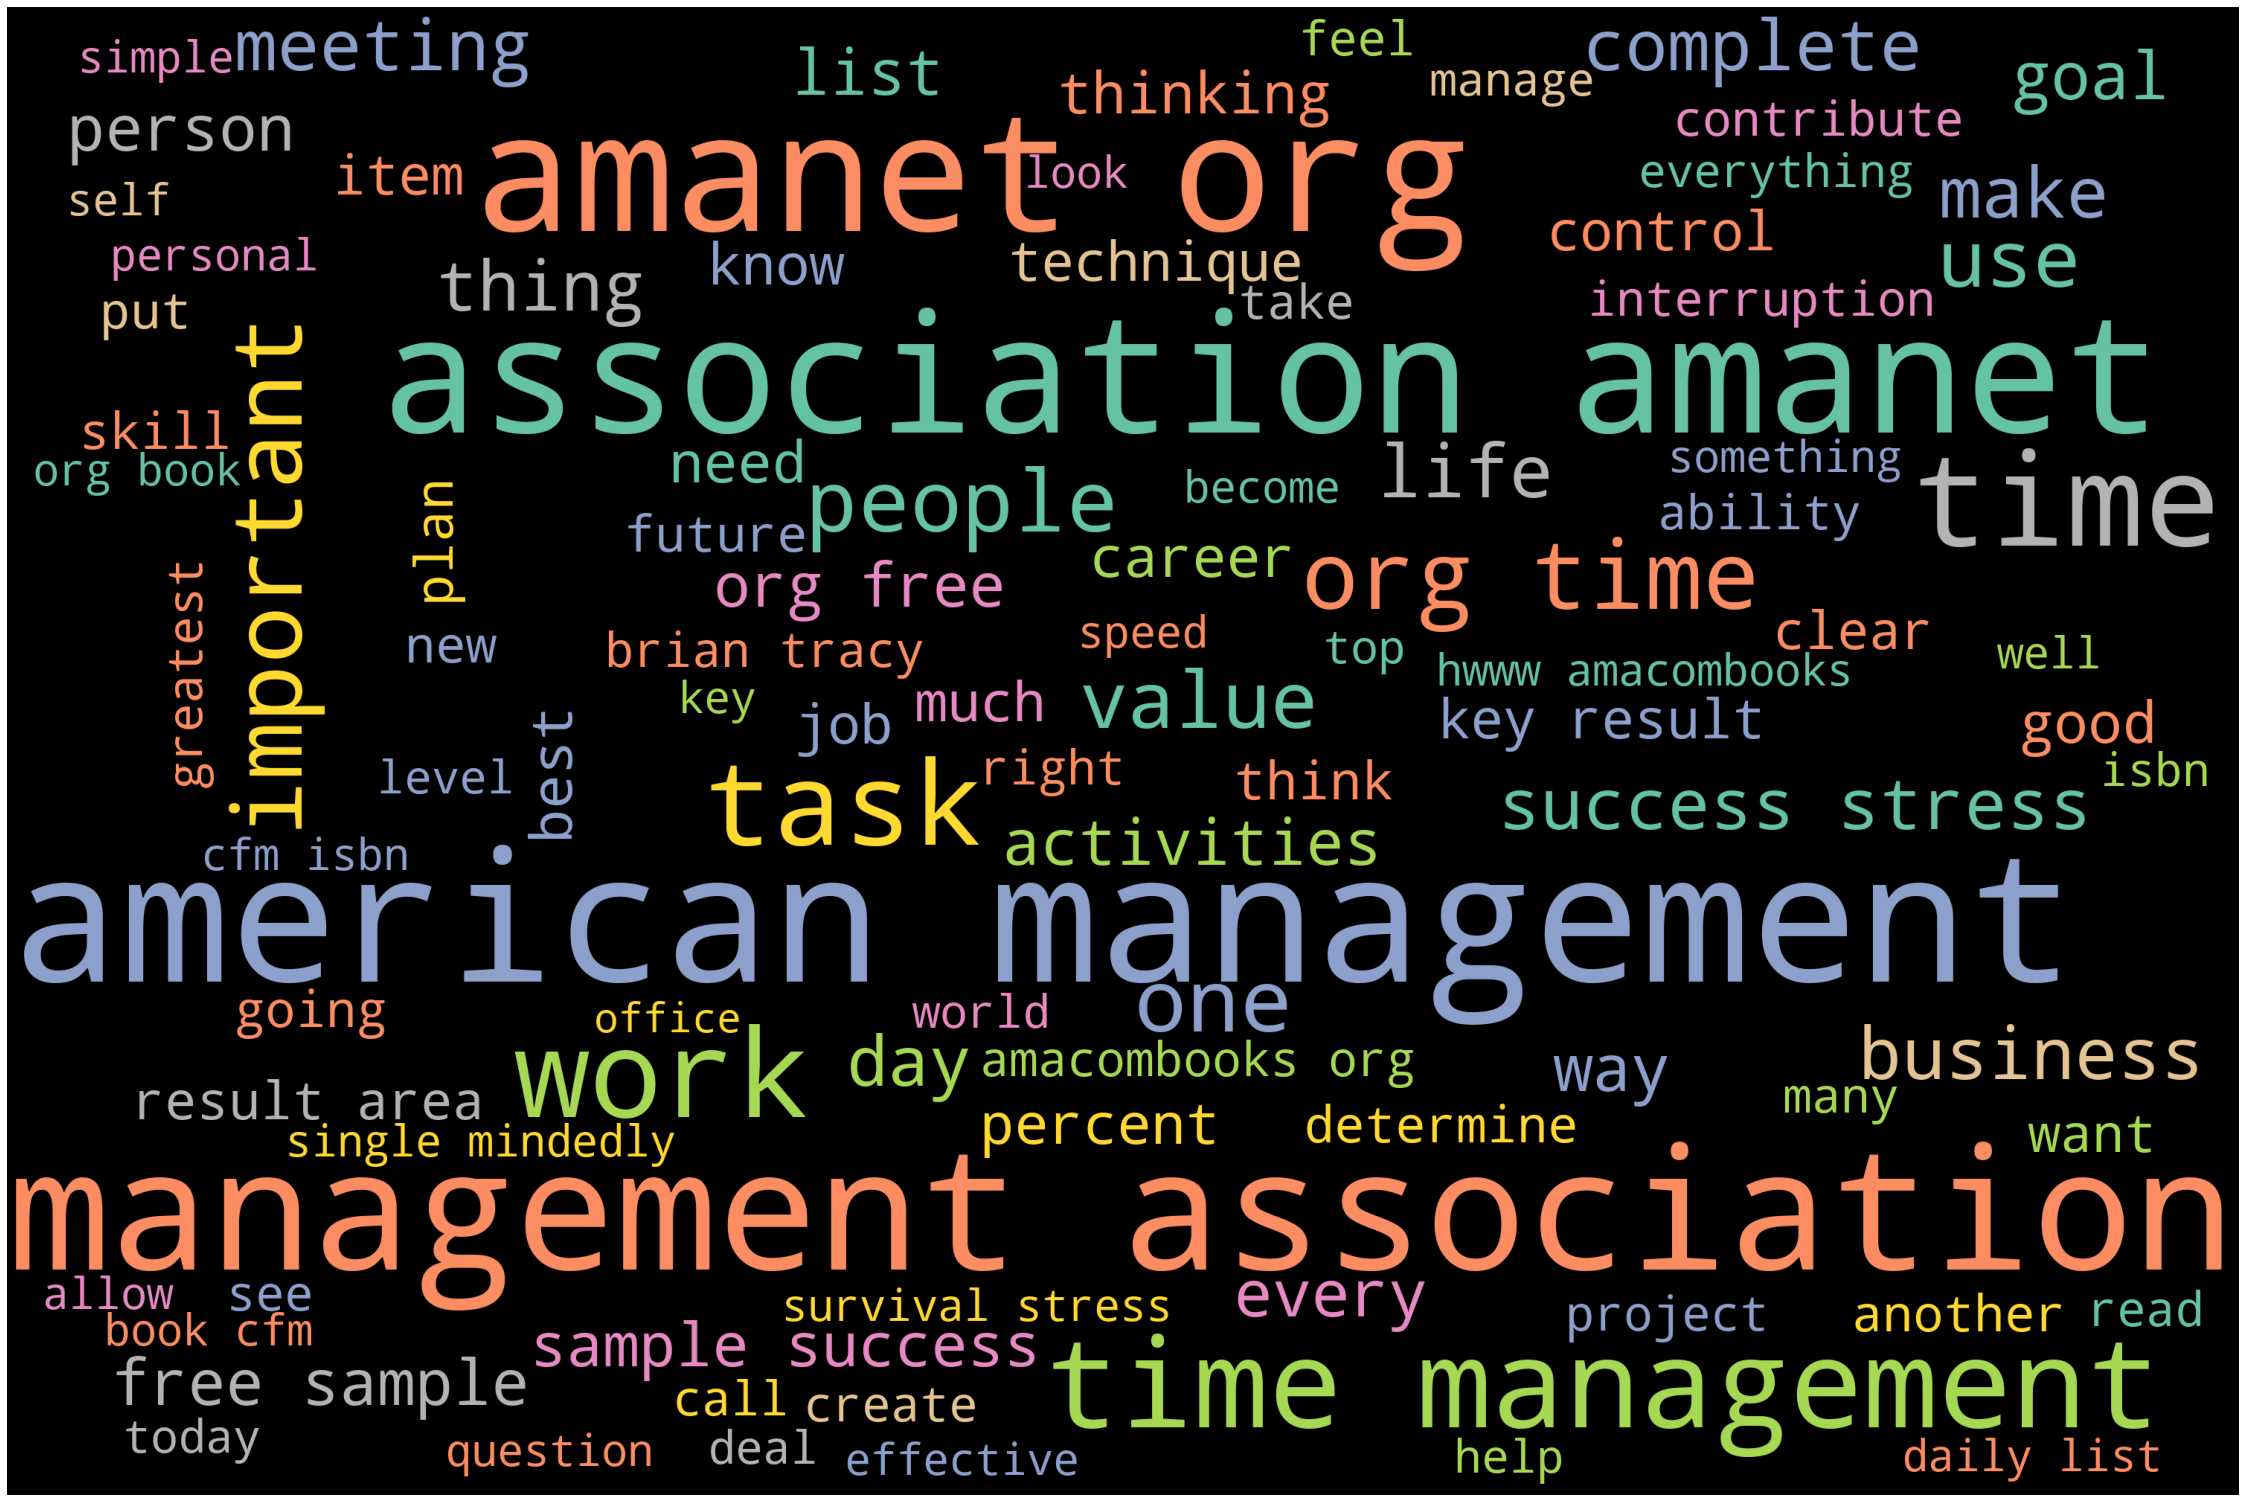

In [ ]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(summary)
# Plot
plot_cloud(wordcloud)

# MODEL 1 PEGASUS SUMMARIZER

In [ ]:
import torch
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
     |████████████████████████████████| 6.6 MB 36.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_name = 'google/pegasus-xsum'

In [ ]:
tokenizer =AutoTokenizer.from_pretrained("google/pegasus-xsum")

Downloading:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [ ]:
from transformers import PegasusForConditionalGeneration,PegasusTokenizer

In [ ]:
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model=PegasusForConditionalGeneration.from_pretrained(model_name).to (torch_device)

Downloading:   0%|          | 0.00/2.12G [00:00<?, ?B/s]

In [ ]:
tokenized_text=tokenizer(text, truncation=True)

In [ ]:
print(tokenized_text[0].tokens)

['▁B', 'RIAN', '▁TRA', 'CY', '▁i', '▁MANAGEMENT', '▁TIME', '▁MANAGEMENT', '▁American', '▁Management', '▁Association', '▁/', '▁www', '.', 'ama', 'net', '.', 'org', '▁American', '▁Management', '▁Association', '▁/', '▁www', '.', 'ama', 'net', '.', 'org', '▁TIME', '▁MANAGEMENT', '▁B', 'RIAN', '▁TRA', 'CY', '▁*', 'AMA', 'COM', '▁a', 'meric', 'AN', '▁MANAGEMENT', '▁ASSOCIATION', '▁New', '▁York', '▁=', '▁Atlanta', '▁=', '▁Brussels', '▁=', '▁Chicago', '▁+', '=', '▁Mexico', '▁City', '▁American', '▁Management', '▁Association', '▁/', '▁www', '.', 'ama', 'net', '.', 'org', '▁Bulk', '▁discounts', '▁available', '.', '▁For', '▁details', '▁visit', ':', '▁www', '.', 'ama', 'com', 'books', '.', 'org', '/', 'go', '/', 'special', 'sales', '▁Or', '▁contact', '▁special', '▁sales', ':', '▁Phone', ':', '▁800-', '250', '-5', '308', '▁/', '▁E', '-', 'mail', ':', '▁specials', 'ls', '@', 'ama', 'net', '.', 'org', '▁View', '▁all', '▁the', '▁AMA', 'COM', '▁titles', '▁at', ':', '▁www', '.', 'ama', 'com', 'books', '.

In [ ]:
print(tokenized_text[0].ids)

[596, 74741, 35743, 33721, 532, 59782, 15370, 59782, 655, 1764, 1534, 943, 2042, 107, 16163, 2829, 107, 1793, 655, 1764, 1534, 943, 2042, 107, 16163, 2829, 107, 1793, 15370, 59782, 596, 74741, 35743, 33721, 2834, 31032, 9618, 114, 40271, 18882, 59782, 74013, 351, 859, 3092, 5417, 3092, 11847, 3092, 2501, 1877, 3728, 3064, 672, 655, 1764, 1534, 943, 2042, 107, 16163, 2829, 107, 1793, 22320, 4472, 293, 107, 321, 703, 558, 151, 2042, 107, 16163, 363, 13108, 107, 1793, 191, 2967, 191, 19910, 17030, 1453, 471, 548, 835, 151, 6160, 151, 17572, 11410, 7119, 34663, 943, 699, 121, 2873, 151, 17597, 13695, 1384, 16163, 2829, 107, 1793, 3461, 149, 109, 35600, 9618, 4690, 134, 151, 2042, 107, 16163, 363, 13108, 107, 1793, 182, 4157, 117, 638, 112, 319, 2598, 111, 21491, 257, 115, 4650, 112, 109, 1220, 841, 1622, 107, 168, 117, 1575, 122, 109, 1301, 120, 109, 2458, 8057, 570, 465, 246, 129, 4607, 107, 3285, 113, 3108, 19111, 273, 121, 386, 121, 41387, 2331, 2247, 603, 943, 5285, 18498, 107, 6154, 4

In [ ]:
text_encoding=tokenizer(text, truncation=True, padding='longest',return_tensors='pt').to(torch_device)

In [ ]:
generated_ids=model.generate(input_ids=text_encoding['input_ids'],attention_mask=text_encoding['attention_mask'])

In [ ]:
text_sum= tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

In [ ]:
text_sum

['Time management is essential for health and personal effectiveness.']

In [ ]:
import nltk
from nltk.translate import bleu
score1 = sentence_bleu(text,text_sum)
score1

NameError: ignored

In [ ]:
Model_Accuracy=len(tgt_text)/len(text)*100
Model_Accuracy

NameError: ignored

# MODEL 2 PIPELINE

In [ ]:
from transformers import pipeline

In [ ]:
sentences=text.split('<eos>')

In [ ]:
max_chunk=500
current_chunk=0
chunks=[]

for sentence in sentences:
    if len(chunks)==current_chunk+1:
        if len(chunks[current_chunk])+len(sentence.split(' '))<max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

0


In [ ]:
for chunk_id in range (len(chunks)):
    chunks[chunk_id]=' '.join(chunks[chunk_id])

In [ ]:
chunks[0]

"BRIAN TRACY i MANAGEMENT TIME MANAGEMENT American Management Association / www.amanet.org American Management Association / www.amanet.org TIME MANAGEMENT BRIAN TRACY *AMACOM americAN MANAGEMENT ASSOCIATION New York = Atlanta = Brussels = Chicago += Mexico City American Management Association / www.amanet.org Bulk discounts available. For details visit: www.amacombooks.org/go/specialsales Or contact special sales: Phone: 800-250-5308 / E-mail: specialsls@amanet.org View all the AMACOM titles at: www.amacombooks.org This publication is designed to provide accurate and authoritative information in regard to the subject matter covered. It is sold with the understanding that the petent professional person should be sought. Library of Congress Cataloging-in-Publication Data Time management / Brian Tracy. Pages cm Includes index. ISBN-13: 978-0-8144-3343-0 ISBN-10: 0-8144-3343-X 1. Time management. I. Title. HD69.T541T727 2014 650.1'1—dce23 2013037775 © 2013 Brian Tracy All rights reserved.

In [ ]:
len(chunks[0].split(' '))

17331

In [ ]:
summarizer=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [ ]:
#res=summarizer(chunks, max_length=16, min_length=10, do_sample=False)

# SUMMARY ONLINE BLOGS

In [ ]:
from transformers import pipeline

In [ ]:
summarizer=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [ ]:
TEXT="""Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.[3]

A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.[5][6] Some implementations of machine learning use data and neural networks in a way that mimics the working of a biological brain.[7][8] In its application across business problems, machine learning is also referred to as predictive analytics.

,As a scientific endeavor, machine learning grew out of the quest for artificial intelligence. In the early days of AI as an academic discipline, some researchers were interested in having machines learn from data. They attempted to approach the problem with various symbolic methods, as well as what was then termed "neural networks"; these were mostly perceptrons and other models that were later found to be reinventions of the generalized linear models of statistics.[23] Probabilistic reasoning was also employed, especially in automated medical diagnosis.[24]: 488 

However, an increasing emphasis on the logical, knowledge-based approach caused a rift between AI and machine learning. Probabilistic systems were plagued by theoretical and practical problems of data acquisition and representation.[24]: 488  By 1980, expert systems had come to dominate AI, and statistics was out of favor.[25] Work on symbolic/knowledge-based learning did continue within AI, leading to inductive logic programming, but the more statistical line of research was now outside the field of AI proper, in pattern recognition and information retrieval.[24]: 708–710, 755  Neural networks research had been abandoned by AI and computer science around the same time. This line, too, was continued outside the AI/CS field, as "connectionism", by researchers from other disciplines including Hopfield, Rumelhart and Hinton. Their main success came in the mid-1980s with the reinvention of backpropagation.[24]: 25 

Machine learning (ML), reorganized as a separate field, started to flourish in the 1990s. The field changed its goal from achieving artificial intelligence to tackling solvable problems of a practical nature. It shifted focus away from the symbolic approaches it had inherited from AI, and toward methods and models borrowed from statistics, fuzzy logic, and probability theory.[25]

The difference between ML and AI is frequently misunderstood. ML learns and predicts based on passive observations, whereas AI implies an agent interacting with the environment to learn and take actions that maximize its chance of successfully achieving its goals.[26]

As of 2020, many sources continue to assert that ML remains a subfield of AI.[27][28][25] Others have the view that not all ML is part of AI, but only an 'intelligent subset' of ML should be considered AI.[4][29][30]"""

In [ ]:
summary_bl=summarizer(TEXT, max_length=130, min_length=30,do_sample=False)

In [ ]:
summary_bl

[{'summary_text': " Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn' Some implementations of machine learning use data and neural networks in a way that mimics the working of a biological brain . In its application across business problems, machine learning is also referred to as predictive analytics ."}]

In [ ]:
Model_Accuracy=len(summary_bl)/len(TEXT)*100
Model_Accuracy

0.02701242571582928

In [ ]:
Text2="""Supervised learning algorithms build a mathematical model of a set of data that contains both the inputs and the desired outputs.[34] The data is known as training data, and consists of a set of training examples. Each training example has one or more inputs and the desired output, also known as a supervisory signal. In the mathematical model, each training example is represented by an array or vector, sometimes called a feature vector, and the training data is represented by a matrix. Through iterative optimization of an objective function, supervised learning algorithms learn a function that can be used to predict the output associated with new inputs.[35] An optimal function will allow the algorithm to correctly determine the output for inputs that were not a part of the training data. An algorithm that improves the accuracy of its outputs or predictions over time is said to have learned to perform that task.[18]

Types of supervised-learning algorithms include active learning, classification and regression.[26] Classification algorithms are used when the outputs are restricted to a limited set of values, and regression algorithms are used when the outputs may have any numerical value within a range. As an example, for a classification algorithm that filters emails, the input would be an incoming email, and the output would be the name of the folder in which to file the email.

Similarity learning is an area of supervised machine learning closely related to regression and classification, but the goal is to learn from examples using a similarity function that measures how similar or related two objects are. It has applications in ranking, recommendation systems, visual identity tracking, face verification, and speaker verification.

Unsupervised learning
Main article: Unsupervised learning
See also: Cluster analysis
Unsupervised learning algorithms take a set of data that contains only inputs, and find structure in the data, like grouping or clustering of data points. The algorithms, therefore, learn from test data that has not been labeled, classified or categorized. Instead of responding to feedback, unsupervised learning algorithms identify commonalities in the data and react based on the presence or absence of such commonalities in each new piece of data. A central application of unsupervised learning is in the field of density estimation in statistics, such as finding the probability density function.[36] Though unsupervised learning encompasses other domains involving summarizing and explaining data features.

Cluster analysis is the assignment of a set of observations into subsets (called clusters) so that observations within the same cluster are similar according to one or more predesignated criteria, while observations drawn from different clusters are dissimilar. Different clustering techniques make different assumptions on the structure of the data, often defined by some similarity metric and evaluated, for example, by internal compactness, or the similarity between members of the same cluster, and separation, the difference between clusters. Other methods are based on estimated density and graph connectivity.

Semi-supervised learning
Main article: Semi-supervised learning
Semi-supervised learning falls between unsupervised learning (without any labeled training data) and supervised learning (with completely labeled training data). Some of the training examples are missing training labels, yet many machine-learning researchers have found that unlabeled data, when used in conjunction with a small amount of labeled data, can produce a considerable improvement in learning accuracy.

In weakly supervised learning, the training labels are noisy, limited, or imprecise; however, these labels are often cheaper to obtain, resulting in larger effective training sets.[37]

Reinforcement learning
Main article: Reinforcement learning
Reinforcement learning is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. Due to its generality, the field is studied in many other disciplines, such as game theory, control theory, operations research, information theory, simulation-based optimization, multi-agent systems, swarm intelligence, statistics and genetic algorithms. In machine learning, the environment is typically represented as a Markov decision process (MDP). Many reinforcement learning algorithms use dynamic programming techniques.[38] Reinforcement learning algorithms do not assume knowledge of an exact mathematical model of the MDP, and are used when exact models are infeasible. Reinforcement learning algorithms are used in autonomous vehicles or in learning to play a game against a human opponent."""

In [ ]:
summary_bl2=summarizer(Text2, max_length=130, min_length=30,do_sample=False)

In [ ]:
summary_bl2

[{'summary_text': ' Supervised learning algorithms build a mathematical model of a set of data that contains both the inputs and the desired output . The data is known as training data, and consists of a training data . The algorithms learn from test data that has not been labeled, classified or categorized . Similarity learning is an area of supervised machine learning closely related to regression and classification .'}]

In [ ]:
Model_Accuracy=len(summary_bl2)/len(Text2)*100
Model_Accuracy

0.020876826722338204

In [ ]:
#!pip install sumy

In [ ]:
#!pip install rouge

# LUHN MODEL

In [ ]:
!pip install sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sumy.summarizers.luhn import LuhnSummarizer

In [ ]:
parser = PlaintextParser.from_string(text,Tokenizer("english"))
    
summarizer_luhn = LuhnSummarizer()
summary_1 = summarizer_luhn(parser.document,1)
dp=[]
for i in summary_1:
    lp=str(i)
dp.append(lp)
summary1 =' '.join(dp)
    
print(summary1)

Printing number 10987654321 American Management Association / www.amanet.org CONTENTS Introduction 1 10 The Psychology of Time Management 4 Determine Your Values 10 Think About Your Vision and Mission 15 Make Written Plans 25 Chart Your Projects 29 Create Your Daily “To-Do” List 34 Set Clear Priorities 40 Stay on Track 47 Determine Your Key Result Areas 53 American Management Association / www.amanet.org 11 12 13 14 15 16 17 18 19 20 21 Delegate to Others 59 Concentrate Single-Mindedly 62 Overcome Procrastination 67 Create Blocks of Time 71 Control Interruptions 75 Batch Your Tasks 78 Manage the Telephone 81 Conduct Effective Meetings 85 Invest in Personal Development 93 Organize Your Work Space 96 Conclusion 98 Index 101 About the Author 105 Free Sample Chapter from Success Under Stress 107 American Management Association / www.amanet.org Introduction success or failure.


In [ ]:
len(text)

104928

In [ ]:
len(summary1)

884

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
score2 = sentence_bleu(text,summary1)
score2

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

9.337437675621443e-232

In [ ]:
!pip install rouge
from rouge import Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Rouge()

In [ ]:
model.get_scores(summary1,text)

[{'rouge-1': {'f': 0.059498955581374954, 'p': 1.0, 'r': 0.03066164604626143},
  'rouge-2': {'f': 0.021855145908360282, 'p': 1.0, 'r': 0.011048304213771839},
  'rouge-l': {'f': 0.059498955581374954, 'p': 1.0, 'r': 0.03066164604626143}}]

In [ ]:
Model_Accuracy=len(summary1)/len(text)*100
Model_Accuracy

0.8424824641659043

In [ ]:
#imports required for flask part

from flask import Flask, render_template,request
#download the summarizer

!pip install pytorch-transformers
!pip install summarizer
from summarizer import Summarizer
#import for SBERT summarizer
!pip install SBERT summarizer
!pip install -U sentence-transformers
from summarizer.sbert import SBertSummarizer
#create an instance of the SBERT
model = SBertSummarizer('paraphrase-MiniLM-L6-v2')
app = Flask(__name__)
@app.route("/")
def msg():
    return render_template('index.html')
@app.route("/summarize",methods=['POST','GET'])
def getSummary():
    body=request.form['Model_Accuracy']
    result = model(body, num_sentences=5)
    return render_template('summary.html',result=result)
if __name__ =="__main__":
    #app.run(debug=True,port=8000)
    app.run(debug=True, use_reloader=False)
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement SBERT (from versions: none)
ERROR: No matching distribution found for SBERT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# LSA MODEL

In [ ]:
from sumy.summarizers.lsa import LsaSummarizer

In [ ]:
parser = PlaintextParser.from_string(text,Tokenizer("english"))
summarizer_lsa = LsaSummarizer()
summary_2 = summarizer_lsa(parser.document,7)
sp = []
for i in summary_2:
    kp =str(i)
sp.append(kp)
summary2 = ' '.join(sp)
    
print(summary2)

American Management Association, a world leader in professional development, has helped millions of people learn new skills, improve performance and work through challenges.


In [ ]:
len(summary2)

173

In [ ]:
score3 = sentence_bleu(text,summary2)
score3

1.1232638958690109e-231

In [ ]:
model=Rouge()

In [ ]:
model.get_scores(summary2,text)

[{'rouge-1': {'r': 0.006339581036383682, 'p': 1.0, 'f': 0.012599287741138821},
  'rouge-2': {'r': 0.0019187162044304901,
   'p': 1.0,
   'f': 0.0038300835272321227},
  'rouge-l': {'r': 0.006339581036383682, 'p': 1.0, 'f': 0.012599287741138821}}]

In [ ]:
Model_Accuracy=len(summary2)/len(text)*100
Model_Accuracy

0.1683567216177816

# AUTOTOKENIZER AUTOMODEL

In [ ]:
from transformers import AutoTokenizer , AutoModelWithLMHead

In [ ]:
tokenizer= AutoTokenizer.from_pretrained('t5-base')

In [ ]:
model=AutoModelWithLMHead .from_pretrained('t5-base',return_dict=True)

In [ ]:
input= tokenizer.encode("summarize: " + text , return_tensors='pt',max_length=512,truncation=True)

In [ ]:
ouput=model.generate (input,max_length=150,min_length=30,length_penalty=5,num_beams=2)

In [ ]:
summary3=tokenizer.decode(ouput[0])

In [ ]:
summary3

'<pad> the degree to which you feel in con- trol of your time and your life is a major determinant of your ing of being “out of control” of your time. if you have developed a habit of time management, you will be able to gain two productive hours each. if you are not able to manage your time effectively, you will be unable to achieve your full potential. if you are not able to manage your time effectively, you will not be able to achieve your</s>'

In [ ]:
len(text)

102758

In [ ]:
len(summary3)

539

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
score4 = sentence_bleu(text,summary3)
score4

8.454659748559197e-232

In [ ]:
model=Rouge()

In [ ]:
model.get_scores(summary3,text)

[{'rouge-1': {'r': 0.012403528114663727,
   'p': 0.9574468085106383,
   'f': 0.024489795665856268},
  'rouge-2': {'r': 0.004099075527646956,
   'p': 0.7966101694915254,
   'f': 0.008156182110719374},
  'rouge-l': {'r': 0.012403528114663727,
   'p': 0.9574468085106383,
   'f': 0.024489795665856268}}]

In [ ]:
Model_Accuracy=len(summary3)/len(text)*100
Model_Accuracy

0.524533369664649